In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import os
from util import read_plumed_file

In [25]:
def process_coord_colvar(colvar_dir, colvar_prefix):
    # get list of colvar files matching supplied directory and prefix
    colvar_paths = glob.glob(os.path.join(colvar_dir, colvar_prefix) + '.*')
    # read colvar files into pandas DataFrames
    colvar_dfs = [read_plumed_file(filename) for filename in colvar_paths]
    # calculate mean coordination number for each tracked residue in each run
    mean_coord = [df.mean(axis=0) for df in colvar_dfs]
    # return DataFrame with precalculated means, arranged w/ CV as column
    return pd.concat(mean_coord, axis=1).T

def contacts_plt(df, color='tab:blue', xlim=(0, 20), savefile=None, title=None):
    fig, ax = plt.subplots(figsize=(3, 10))
    # Example data
    y_pos = np.arange(len(df.columns))
    contacts = df.mean().sort_values()
    error = df[contacts.index].std()

    ax.barh(y_pos, contacts, xerr=error, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(contacts.index)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Atomic contacts')
    ax.set_title(title)
    plt.xlim(xlim)
    if savefile is not None:
        plt.savefig(savefile, bbox_inches='tight', dpi=300)
    plt.show()

# indoxyl sulfate

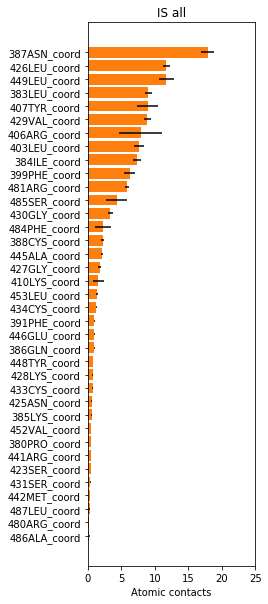

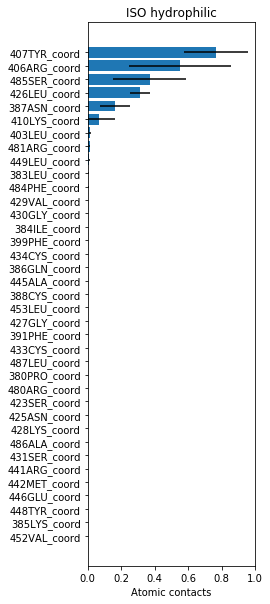

In [26]:
# read coordination number data from COLVAR files
iso_all = process_coord_colvar('data/indoxyl-sulfate/driver/', 'coord_COLVAR')
iso_hydrophilic = process_coord_colvar('data/indoxyl-sulfate/driver/', 
                                       'hydrophilic_coord_COLVAR')
# print ranked coordination numbers
contacts_plt(iso_all, color='tab:orange', xlim=(0, 25), title='IS all')
contacts_plt(iso_hydrophilic, color='tab:blue', xlim=(0, 1), title='IS hydrophilic')